# Exploratory Data Analysis
This notebook is used to analyze the tabular and image data of the ADNI-Dataset

TODO:
[] Visualize data without duplicates (use first visit per subject)
[] Track change in diagnosis in individual subject (i.e how many patients progressed from CN to MCI to AD
[] Discuss plots
[] Create ProfileReport

In [4]:
#!pip install pandas_profiling
#from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
sys.path.insert(0, '../../scripts/')

from helpers import miscellaneous as misc
from helpers import plotters
CONFIG = misc.get_config()

In [5]:
os.getcwd()

'D:\\FHNW\\Challenges\\fhnw_ds_fs22_cdl1_cml1_Brain_Health_Challenge\\notebooks\\0_eda'

In [6]:
CONFIG

{'RAW_DATA_DIR': 'data/raw/',
 'PROCESSED_DATA_DIR': 'data/processed/',
 'FLATTENED_DATA_DIR': 'data/raw/flattened',
 'DEVICE': 'gpu',
 'COLOR_SEQUENTIAL': 'inferno',
 'COLOR_DISCRETE': 'Paired',
 'RANDOM_STATE': '42'}

## Overiew on raw data

In [7]:
data = pd.read_csv('../../data/raw/data/images/ADNI1_Complete_1Yr_1.5T_1_20_2022.csv')
data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN
2,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,NaN
3,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN
4,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN


In [8]:
# profiling_file_name = "adni_profiling_report.html"
#
# if os.path.isfile(profiling_file_name):
#     with open(profiling_file_name) as f:
#         profile = f.readlines()
# else:
#     profile = ProfileReport(data, title='ADNI Image Data', explorative=False)
#     profile.to_file(profiling_file_name)
#
# # profile.to_notebook_iframe()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  2294 non-null   object 
 1   Subject        2294 non-null   object 
 2   Group          2294 non-null   object 
 3   Sex            2294 non-null   object 
 4   Age            2294 non-null   int64  
 5   Visit          2294 non-null   int64  
 6   Modality       2294 non-null   object 
 7   Description    2294 non-null   object 
 8   Type           2294 non-null   object 
 9   Acq Date       2294 non-null   object 
 10  Format         2294 non-null   object 
 11  Downloaded     0 non-null      float64
dtypes: float64(1), int64(2), object(9)
memory usage: 215.2+ KB


### Duplications and consequences

In [10]:
data['Subject'].duplicated().sum()

1655

In [11]:
len(data['Subject'].unique())

639

**Note:** The dataset consists of 639 individual subjects. Out of which many had more than one visit and thus multiple entries in the dataframe. An analysis of whole dataset would skew the distributions as not all subjects had the same number of visits. I.e. we need to select a subset of the dataframe for further analysis. To analyze the age and gender distribution we can select all samples where the condition `Visit == 1` holds true.

In [12]:
data['Acq Date'] = pd.to_datetime(data['Acq Date'])

In [13]:
data.head(2)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-03-02,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2008-06-01,NiFTI,NaN


In [14]:
data.describe()

,Age,Visit,Downloaded
count,2294.000000,2294.000000,0.0
mean,75.638622,2.589364,NaN
std,6.662227,1.271510,NaN
min,55.000000,1.000000,NaN
25%,72.000000,1.000000,NaN
50%,76.000000,3.000000,NaN
75%,80.000000,4.000000,NaN
max,91.000000,11.000000,NaN


# Distributions on study entry
I.e. only data is considered that corresponds to the initial visit of the subject. (`Visit == 1`)

In [15]:
data_visit_1 = data[data['Visit'] == 1] # selects only the first visits in the data
data_visit_1.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-03-02,NiFTI,NaN
3,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,2007-01-30,NiFTI,NaN
7,I66462,941_S_1197,CN,F,82,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-01-20,NiFTI,NaN
9,I63847,941_S_1194,CN,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-01-20,NiFTI,NaN
14,I48608,141_S_1255,MCI,F,77,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-02-03,NiFTI,NaN


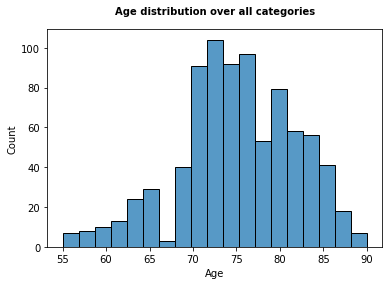

In [16]:
g = sns.histplot(data_visit_1, x='Age', palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', '', 'Age', 'Count')

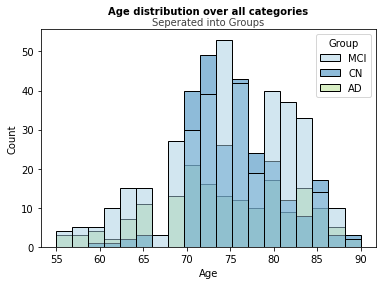

In [17]:
g = sns.histplot(data_visit_1, x='Age', hue="Group", palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', 'Seperated into Groups', 'Age', 'Count')

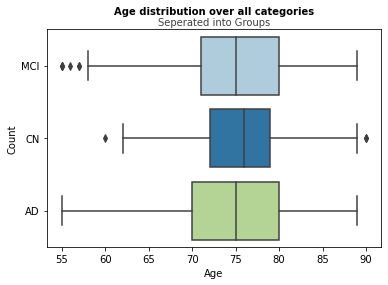

In [35]:
g = sns.boxplot(data=data_visit_1, x='Age', y="Group", palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', 'Seperated into Groups', 'Age', 'Count')

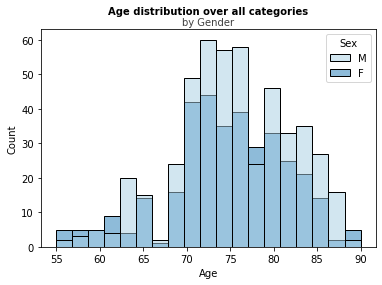

In [18]:
g = sns.histplot(data_visit_1, x='Age', hue="Sex", palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', 'by Gender', 'Age', 'Count')

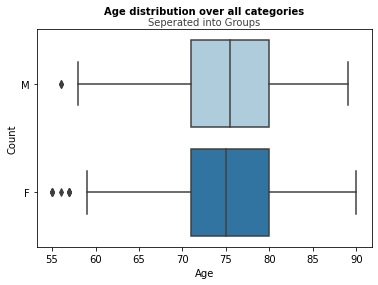

In [36]:
g = sns.boxplot(data=data_visit_1, x='Age', y="Sex", palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', 'Seperated into Groups', 'Age', 'Count')

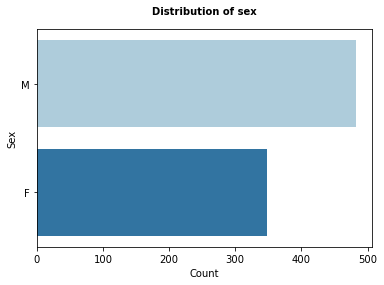

In [19]:
g = sns.countplot(y=data_visit_1.Sex, palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Distribution of sex', '', 'Count','Sex')

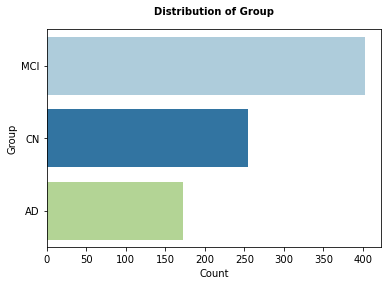

In [20]:
g = sns.countplot(y=data_visit_1.Group, palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Distribution of Group', '', 'Count','Group')

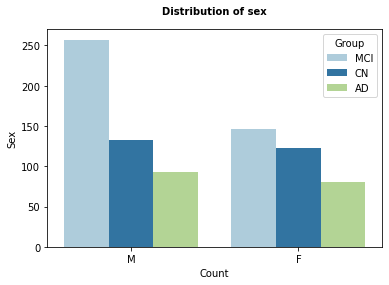

In [21]:
g = sns.countplot(data=data_visit_1, x='Sex', hue='Group', palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Distribution of sex', '', 'Count','Sex')

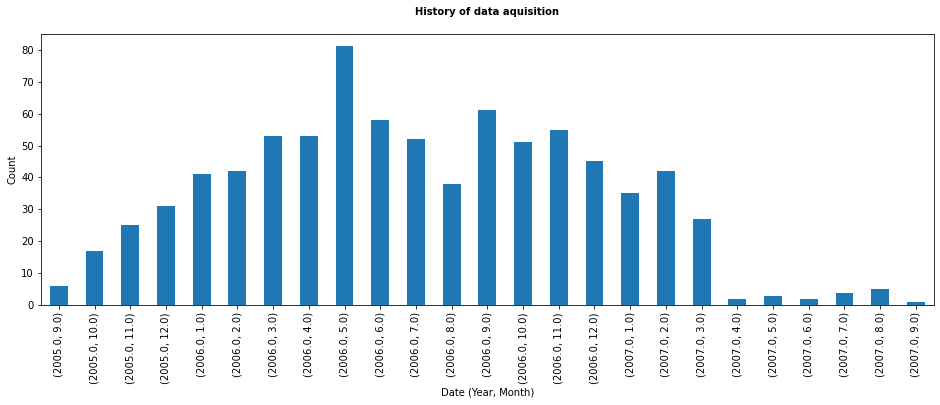

In [22]:
plt.figure(figsize=(16,5))
g = data.groupby([data_visit_1["Acq Date"].dt.year, data_visit_1["Acq Date"].dt.month]).Subject.count().plot(kind="bar")
plotters.plot_wrapper(g, 'History of data aquisition', '', 'Date (Year, Month)','Count')

In [23]:
# TODO: plot group distribution on first visit and on all last visits

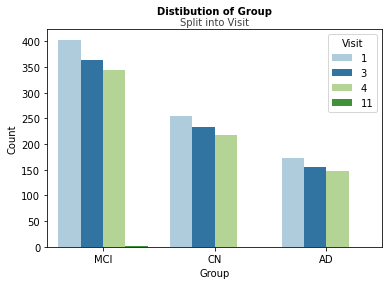

In [24]:
g = sns.countplot(data = data, x='Group', hue='Visit', palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Distibution of Group', 'Split into Visit', 'Group','Count')

In [25]:
data[data.Visit == 11]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
2044,I87484,011_S_0168,MCI,M,91,11,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-04-16,NiFTI,NaN


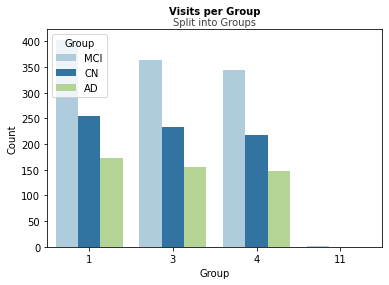

In [26]:
g = sns.countplot(data = data, x='Visit', hue='Group', palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Visits per Group', 'Split into Groups', 'Group','Count')

In [27]:
data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-03-02,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2008-06-01,NiFTI,NaN
2,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,2007-09-27,NiFTI,NaN
3,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,2007-01-30,NiFTI,NaN
4,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-08-24,NiFTI,NaN


In [28]:
data.groupby('Subject').Group.nunique().value_counts()

1    639
Name: Group, dtype: int64

**Note:** The code cell above shows that no subject transitioned from one Group to another in any form.

In [29]:
data.groupby('Subject').Visit.nunique().value_counts()

3    639
Name: Visit, dtype: int64

**Note:** Also. All subjects in the dataset had exactly three visits. With one exception that has a Visit with value 11. We check for dataerror in the next code cell:

In [30]:
data[data.Subject == '011_S_0168']

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
2044,I87484,011_S_0168,MCI,M,91,11,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-04-16,NiFTI,NaN
2045,I35569,011_S_0168,MCI,M,90,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2006-08-21,NiFTI,NaN
2046,I35499,011_S_0168,MCI,M,89,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,2006-02-10,NiFTI,NaN
